### 규제 현성 모델 - 릿지, 라쏘, 엘라스틱넷

#### 규제 선형 모델의 개요
- 회귀 모델은 적절히 데이터에 적합하며넛도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
- 이전까지 선형 모델의 비용함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려했습니다.
- 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌습니다.
- 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽습니다.
- 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형이 이뤄야 합니다.

- alpha 값을 크게 하면 비용함수는 회귀 계수W의 값을 작게 해 과적합을 개선할 수 있으며 alpha 값을 작게하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있습ㄴ디ㅏ.
- 즉 alpha를 0에서부터 지속적으로 값을 증가시키면 회귀계수 값의 크기를 감소시킬 수 있습니다.
- 이처럼 비용 함수 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 부릅니다.

+ 규제의 방식
    - L2
        - W의 제곱에 대해 패널티를 부여하는 방식을 말한다.
    - L1
        - W의 절대값에 대해 패널티를 부여한다. 
        - L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.

#### 릿지 회귀
- L2에 해당된다.

In [3]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터셋인 X_data과 Targer 데이터셋인 y_target 데이터셋을 그대로이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


- alpha값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정

In [4]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_score = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5folds의 평균 RMSE : 5.518
alpha 0.1일 때 5folds의 평균 RMSE : 5.518
alpha 1일 때 5folds의 평균 RMSE : 5.518
alpha 10일 때 5folds의 평균 RMSE : 5.518
alpha 100일 때 5folds의 평균 RMSE : 5.518


- 각 alpha에 따른 회귀 계수 값을 시각화 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

<function matplotlib.pyplot.show(close=None, block=None)>

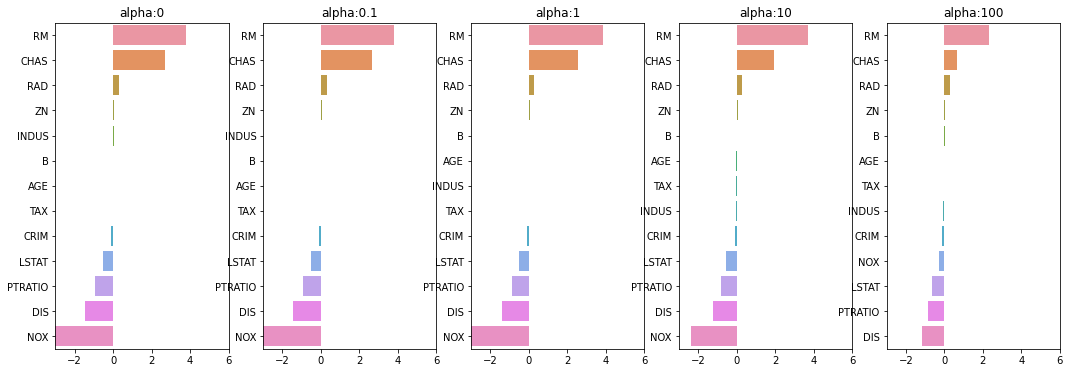

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장 pos는 axis의 위치지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show

- alpha 값에 따른 컬럼별 회귀계수 출력

In [12]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### 라쏘 회귀
- W의 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것
- 즉 L1 규제는 L2 규제가 회귀 계수의 크기를 감소하는데 반해 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거합니다.
- 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있습니다.

In [13]:
from sklearn.linear_model import Lasso, ElasticNet

# alpah값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('########',model_name,'########')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE : {1:.3f}'.format(param,avg_rmse))

        # cross_val_score evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [15]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.007, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######## Lasso ########
alpha 0.007일 때 5폴드 세트의 평균 RMSE : 5.764
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.189


In [16]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.007,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.812893,3.703202,2.498212,0.949811,0.000000
CHAS,2.558952,0.955190,0.000000,0.000000,0.000000
RAD,0.300783,0.274707,0.277451,0.264206,0.061864
ZN,0.046728,0.049211,0.049544,0.049165,0.037231
INDUS,0.010701,-0.036619,-0.005253,-0.000000,-0.000000
B,0.009433,0.010249,0.009469,0.008247,0.006510
AGE,-0.001065,-0.010037,0.003604,0.020910,0.042495
TAX,-0.012540,-0.014570,-0.015442,-0.015212,-0.008602
CRIM,-0.106763,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.528765,-0.568769,-0.656290,-0.761115,-0.807679


#### 엘라스틱넷 회귀
- L2 규제와 L1 규제를 결합한 회귀입니다.
- 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀계수 0으로 만드는성향이 강합니다.
- 특히 이러한 성향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것입니다.
- 반대로 엘라스텍넷 회귀의 단점은 L1과 L2규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것입니다.

In [17]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######## ElasticNet ########
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.068


In [19]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### 선형회귀모델을 위한 데이터변환

- 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고 이러한 최적의 선형함수를 찾아내 결과값을 예측합ㄴ디ㅏ.
- 또한 선형 회귀 모델은 피처값과 타깃값의 분포가 정규분포(즉 평균을 중심으로 종 모양으로 데이터 값이 분포된형태) 형태를 매우 선호합니다.
- 특히 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높습니다.
- 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있습니다.
- 따라서 선형회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적입니다.
- 하지만 이러한 스케일링/정규화 작업을 선행하낟고 해서 무조건 예측 성능이 향상되는 것인 아닙니다.
- 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행합니다.

+ 일반적으로 피처 데이터 세트와 타깃 데이터 세트에 이러한 스케일링/정규화 작업을 수행하는 방법이 조금은다릅니다.
    - StandardScaler 클래스를 이옹해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용햇 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행합니다.
    - 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법입니다. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용합니다.
    - 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됩니다. 이러한 변환을 로그 변환이라고 부릅니다. 로그변환은 매우 유용한 변환이며, 실제로 선형 회구에서는 앞에서소개한 1,2 번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법입니다. 왜냐하면 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수적으로 늘어나서 과적합 이슈가 발생할 수 있기 때문이다.

- 타깃값의 경우는 일반적으로 로그 변환을 적용합니다. 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있습니다.
- 무엇보다도, 왜곡된 분포도 형태의 타깃값을 로그 변환하여 예측 성능 향상이 된 경우 많은 사례에서 검증되었기 때문에 타깃값의 경우는 로그 변환을 적용합니다.

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

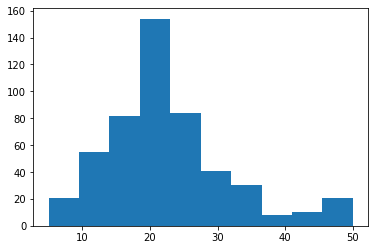

In [30]:
# 정규화정도를 확인하여 스케줄링을 할지 경정을하는 것이다.
print(y_target.shape)
plt.hist(y_target,bins=10)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [24]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]
# 변환 방법은 모드 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard',None), ('Standard',2),('MinMax',None), ('MinMax',2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형 : {0}, Polynomia Degree : {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형 : None, Polynomia Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.330

## 변환 유형 : Standard, Polynomia Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.421

## 변환 유형 : Standard, Polynomia Degree : 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE : 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE : 4.634

## 변환 유형 : MinMax, Polynomia Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE : 7.635

## 변환 유형 : MinMax, Polynomia Degree : 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE : 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.185
alpha 100일 때 5폴드 세트의 평균 RMSE : 6.538

## 변환 유형 : Log, Polynomia Degree : None
alpha 0.1일 때 5폴드 세

In [29]:
X = np.arange(6).reshape(3,2)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

- 일반적으로 선형회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있습니다.